In [108]:
import pandas as pd
import numpy as np

In [109]:
class LassoRegression:
    """
    This class implements the Lasso Regression model from scratch.
    Lasso regression is a type of linear regression that uses shrinkage.
    Shrinkage is where data values are shrunk towards a central point, like the mean.
    A tuning parameter, lambda controls the strength of the L1 penalty.
    """
    def __init__(self, learning_rate= 0.01, n_iters= 1000, lambda_l= 1):
        self.lr = learning_rate
        self.iterations = n_iters
        self.lambda_l = lambda_l
        self.theta = None
        self.bias = None
        self.loss = []
    def _linear_model(self, X):
        """
        Compute the linear model for the given feature matrix.
        Args:
            X (numpy.ndarray): the feature matrix to compute.
        Returns:
            numpy.ndarray: the computed linear model.
        """
        return np.dot(X, self.theta) + self.bias
    def _initialize_parameters(self, n_features):
        """
        Initialize the weights and bias with random values
        Args:
            n_features (int): the number of features in the dataset.
        """
        self.theta = np.random.random_sample(n_features)
        self.bias = np.random.random_sample()
    def _compute_theta_derivative(self, X, y, linear_model):
        """
        Compute the derivative of theta for the given feature matrix, target vector, and linear model.
        Args:
            X (numpy.ndarray): the feature matrix.
            y (numpy.ndarray): the target vector.
            linear_model (numpy.ndarray): the computed linear model.
        Returns:
            numpy.ndarray: the computed derivative of theta.
        """
        n_samples, n_features = X.shape
        d_theta = np.zeros(n_features)
        for j in range(n_features):
            if self.theta[j] > 0:
            #This condition checks whether the current value of the feature coefficient (theta) is positive.
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) + self.lambda_l)
            else:
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) - self.lambda_l)
        return d_theta
    def _compute_bias_derivative(self, X, y, linear_model):
        """
        Compute the derivative of the bias for the given feature matrix, target vector, and linear model.
        Args:
            X (numpy.ndarray): The feature matrix.
            y (numpy.ndarray): The target vector.
            linear_model (numpy.ndarray): The predicted target values (linear model output).
        Returns:
            float: The derivative of the bias.
        """
        d_bias = -(2/X.shape[0]) * np.sum(y - linear_model)
        return d_bias
    def _validate_inputs(self, X, y):
        """
        Validate the dimensions of the feature matrix and the target vector.
        Args:
            X (numpy.ndarray): The feature matrix.
            y (numpy.ndarray): The target vector.
        Raises:
            AssertionError: If the number of samples in the feature matrix and the target vector is not equal.
        """
        assert X.shape[0] == y.shape[0], 'The number of samples in the feature matrix and the target vector should be equal.'
    def _calculate_cost(self, y, z):
        """
        Calculate the Lasso cost (error) for the given target, prediction, and lambda.
        Args:
            y (numpy.ndarray): The true target values.
            z (numpy.ndarray): The predicted target values.
        Returns:
            float: The calculated Lasso cost (root mean squared error + L1 penalty).
        """
        n_samples = y.shape[0] 
        lasso_loss = (1/n_samples) * np.sum(np.square(y - z)) + (self.lambda_l * np.sum(np.abs(self.theta)))
        return np.sqrt(lasso_loss)
    def fit(self, X, y):
        self._validate_inputs(X, y)
        self._initialize_parameters(X.shape[1])
        for _ in range(self.iterations):
            linear_model = self._linear_model(X)
            d_theta = self._compute_theta_derivative(X, y, linear_model)
            d_bias = self._compute_bias_derivative(X, y, linear_model)
            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias
            self.loss.append(self._calculate_cost(y, linear_model))
    def predict(self, X):
        """
        Predict the target value for the given feature matrix.
        Args:
            X (numpy.ndarray): the feature matrix to predict.
        Returns:
            numpy.ndarray: the predicted target values.
        """
        return self._linear_model(X)
    def cost(self):
        """
        Return the computed loss for the model.
        Returns:
            list: the list of loss values for each iteration.
        """
        return self.loss 

In [110]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def my_plot(cost):
    iterations = [i for i in range(1, 1001)]
    fig, ax = plt.subplots()
    ax.plot(iterations, cost, color='red')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs Iterations')
def surface_plot(X, y, prediction, degree):
    fig = plt.figure(figsize=[30, 50])
    ax = fig.add_subplot(5, 2, degree, projection='3d')
    ax.scatter(X[:,0], X[:,1], y, zdir='z', s=20, c='#9467bd', depthshade=True)    
    Y_plot = np.asarray(prediction) #converting the prediction data to a numpy array. 
    X = np.asarray(X)
    ax.plot_trisurf(X[:, 0], X[:, 1], Y_plot, cmap = 'viridis')
    ax.set_xlabel('$Age$', fontsize=10, rotation=150)
    ax.set_ylabel('$BMI$', fontsize=10, rotation=150)
    ax.set_zlabel('$Insurance$', fontsize=10, rotation=60)
    ax.set_title('Degree: ' + str(degree), fontsize=20)
    plt.show()
    

In [111]:
data = pd.read_csv('E:\Excel Sheets\datasheet.csv')
data.head()

,age,bmi,children,charges
0,27,32.23,3,1.990910e+06
1,27,25.60,3,3.934655e+05
2,32,26.20,2,5.755353e+05
3,29,25.80,3,1.990910e+06
4,21,24.20,2,1.992344e+05


In [112]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4, include_bias= False)
X = data.iloc[:, :3]
X.head()

,age,bmi,children
0,27,32.23,3
1,27,25.60,3
2,32,26.20,2
3,29,25.80,3
4,21,24.20,2


In [113]:
X = poly.fit_transform(X)
X = (X - X.mean(axis= 0)) / X.std(axis= 0)
y = data.iloc[:, 3]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [115]:
lasso = LassoRegression(learning_rate= 0.01, n_iters= 1000, lambda_l= 500)
lasso.fit(X_train, y_train)
y_predicted_l = lasso.predict(X_train)
cost_lasso = lasso.cost()

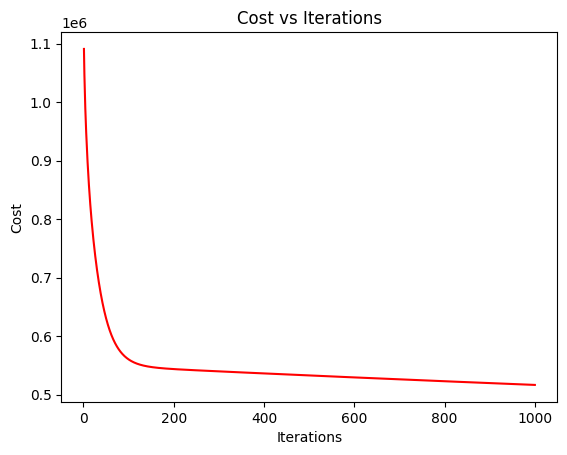

In [116]:
my_plot(cost_lasso)

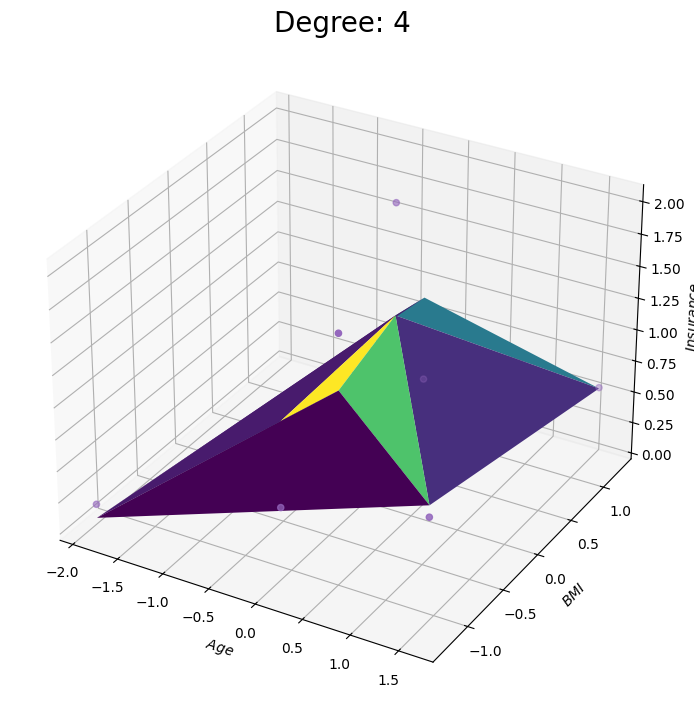

In [117]:
surface_plot(X_train, y_train, y_predicted_l, 4)